there are so many use case in which you may want to have multiple output
For example, you may want to locate and classify the main object in a picture. This is both classification (finding the object in picture) and regression (find out its exact location as well as height and width) task

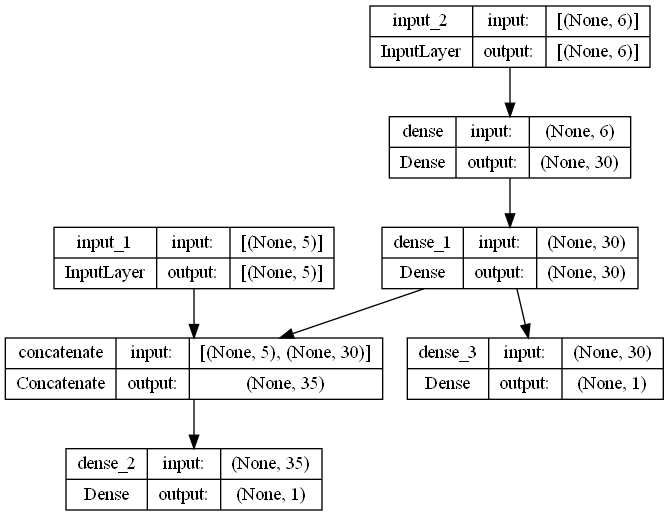

In [1]:
from tensorflow import keras
input_A=keras.layers.Input(shape=[5])
input_B=keras.layers.Input(shape=[6])
hidden1=keras.layers.Dense(30,activation="relu")(input_B)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.concatenate([input_A,hidden2])
output=keras.layers.Dense(1)(concat)
aux_output=keras.layers.Dense(1)(hidden2)
model=keras.models.Model(inputs=[input_A,input_B],outputs=[output,aux_output])
keras.utils.plot_model(model, show_shapes=True)

Each output will need its own loss function , so when we compile the model we should pass a list of losses.By default, keras will compute all these losses and simply add them up to get the final loss used for training. However, we care much more about the main output than about auxillary output, so we want to give the main output's loss a much greater weight. Fortunately, it is possible to set all the loss weights when compiling the model

In [2]:
model.compile(loss=['mse','mse'],loss_weights=[0.9,0.1],optimizer="sgd")